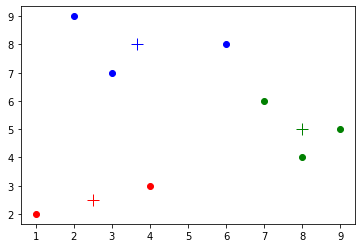

In [1]:
from numpy import *
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


#dataSet:聚类数据集
#k:指定的k个类（大佬）
def kmeans(dataSet, k):
    #得到数据样本的维度n
    sampleNum, col = dataSet.shape
     #初始化为一个(k,n)的矩阵=簇
    cluster = mat(zeros((sampleNum, 2)))
    #生成全零阵
    centroids = zeros((k, col))
    #选择质心
    for i in range(k):
        #索引为随机生成的int类型的且在0-sampleNum间的数
        index = int(random.uniform(0, sampleNum))
        centroids[i, :] = dataSet[index, :]
    #设置flag，查看聚类结果是否发生变化
    clusterChanged = True
     #只要聚类结果一直发生变化，就一直执行聚类算法，直至所有数据点聚类结果不变化
    while clusterChanged:
        #聚类结果变化布尔类型置为false
        clusterChanged = False
         #遍历数据集每一个样本向量
        for i in range(sampleNum):
            #使用sqrt函数（二分法）
            minDist = sqrt(sum(power(centroids[0, :] - dataSet[i, :], 2)))
            minIndex = 0
            #计算点到质心的距离
            for j in range(1,k):
                distance = sqrt(sum(power(centroids[j, :] - dataSet[i, :], 2)))
                #当前最小距离一定时，索引为J
                if distance < minDist:
                    minDist  = distance
                    minIndex = j

            # 当前聚类结果中第i个样本的聚类结果发生变化：布尔类型置为true，继续聚类算法
            if cluster[i, 0] != minIndex:
                clusterChanged = True
                #更新聚类结果和平方误差
                cluster[i, :] = minIndex, minDist**2
        #遍历每一个质心
        for j in range(k):
            #筛选出属于当前质心类的所有样本
            pointsInCluster = dataSet[nonzero(cluster[:, 0].A == j)[0]]
            #计算列的均值（使用axis=0：求列的均值）
            centroids[j, :] = mean(pointsInCluster, axis = 0)

    return centroids, cluster

#创建简单数据集以及进行可视化
dataSet = [[3,7],[2,9],[6,8],[8,4],[9,5],[1,2],[7,6],[4,3]]
dataSet = mat(dataSet)
k = 3
centroids, cluster = kmeans(dataSet, k)
sampleNum, col = dataSet.shape
mark = ['or', 'ob', 'og']

for i in range(sampleNum):
    markIndex = int(cluster[i, 0])
    plt.plot(dataSet[i, 0], dataSet[i, 1], mark[markIndex])

mark = ['+r', '+b', '+g']
for i in range(k):
    plt.plot(centroids[i, 0], centroids[i, 1], mark[i], markersize=12)

plt.show()